# Pointing Experiment

## Testdesign

In this study we want to evaluate our newly designed mouse pointing technique for pointing in grid like setups (i.e. Windows Desktop). The technique puts the mouse cursor on the position of the closest target when the left mouse button is clicked. By this we hope to improve pointing time, as users have to be less precise when clicking on targets. For each condition Participants will be presented with a grid of similiar looking targets. One of the targets will then be highlighted. The particpants are instructed to click the highlightes target as fast as they can. Their reaction times will be tested both with the novel pointing technique and without it. Our goal is to measure if the new technique significantly improves  pointing time. Additionally we want to test which technique leads to more errors. Errors are defined by clicks outside the highlighted target.

H0: Our novel pointing technique does not affect pointing time, when pointing to a target in a grid like structure.

H02: Our novel pointing technique does not affect the amount of errors (clicks outside the target), when pointing on targets in a grid like structure.

### Participants

Due to limited ressources and the current situation we were only able to test two participants.Both participants were male, between 20 and 30 years old and are proficient in working with a mouse and computer. Each of the participants took part in the experiment twice, once with the novel technique and once without.
The small number of participants should be considered in the results.

### Setup

The test was split into three conditions, where each condition is represented by the amount of rows and columns of targets. We tested the following conditions (columns,rows): (8,4),(10,5),(20,10). For each condition a grid of targets represented by circles was drawn on the screen. As the screen size stayed the same, more rows and columns means smaller targets. One of the targets was higlighted which the participants were instructed to click on beforehand. This process was repeated 10 times for each condition. Each new repetition was started as soon as the participant successfully clicked on the highlighted target. At the beginning of each repetition the mouse cursor was set to the middle of the screen. Each participant had performed 2 passes of the entire test, so twice for each condition. One pass was performed with the novel pointing technique and one was performed without. We measured the time it took to click on the target for each repetition and also counted errors, so how many times the participant clicked outside the highlighted target before successfully clicking inside it

### Variables

Independent variables: order of the tests, use of novel technique (on/off)

Dependent variables: reaction time, errors

Controlled variables: pointing device (mouse), screen resolution, screen size, screen position, environment.

Possible confounding variables: learning effect, fatigue

To counterbalance the confounding variables of fatigue and learning effect both the conditions and the use of the novel technique were counterbalanced. The conditions were balanced by using the latin squares method (reduced form). For the novel technique we simply tested it first for half the participants and tested it second for the other half.

## Package import

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

## Import data via csv

In [2]:
#import csv data
headerlist= ["user_id", "current_size", "max_size", "use_novel_technique",
                    "elapsed_repetitions", "target", "click_offset", "distance", "time(ms)",
                    "errors", "timestamp"]

df_data = pd.read_csv('result.csv', names= headerlist)
df_data

,user_id,current_size,max_size,use_novel_technique,elapsed_repetitions,target,click_offset,distance,time(ms),errors,timestamp
0,1,"[10, 5]",1000,True,1,"(900.0, 500.0, 75.0)","(0.0, 0.0)",0,735,0,2021-05-12T14:47:01
1,1,"[10, 5]",1000,True,2,"(700.0, 900.0, 75.0)","(0.0, 0.0)",0,862,0,2021-05-12T14:47:02
2,1,"[10, 5]",1000,True,3,"(700.0, 100.0, 75.0)","(0.0, 0.0)",0,849,0,2021-05-12T14:47:03
3,1,"[10, 5]",1000,True,4,"(900.0, 300.0, 75.0)","(0.0, 0.0)",0,792,0,2021-05-12T14:47:04
4,1,"[10, 5]",1000,True,5,"(700.0, 900.0, 75.0)","(0.0, 0.0)",0,781,0,2021-05-12T14:47:05
...,...,...,...,...,...,...,...,...,...,...,...
235,4,"[10, 5]",1000,True,6,"(1900.0, 300.0, 75.0)","(0.0, 0.0)",0,1322,0,2021-05-12T16:26:29
236,4,"[10, 5]",1000,True,7,"(1100.0, 100.0, 75.0)","(0.0, 0.0)",0,1193,0,2021-05-12T16:26:31
237,4,"[10, 5]",1000,True,8,"(300.0, 700.0, 75.0)","(0.0, 0.0)",0,957,0,2021-05-12T16:26:32
238,4,"[10, 5]",1000,True,9,"(900.0, 100.0, 75.0)","(0.0, 0.0)",0,783,0,2021-05-12T16:26:32


In [3]:
#group data per condition
df_cond_1 = df_data[df_data['current_size'] == '[10, 5]']
df_cond_2 = df_data[df_data['current_size'] == '[20, 10]']
df_cond_3 = df_data[df_data['current_size'] == '[8, 4]']

In [4]:
#group data if novel pointing technique is used or not
df_novel_true = df_data[df_data['use_novel_technique'] == True]
df_novel_false = df_data[df_data['use_novel_technique'] == False]

## Evaluation

### Completion time per condition without novel technique

In [5]:
cond1_novel_false = df_cond_1['time(ms)'][df_cond_1['use_novel_technique'] == False]
cond2_novel_false = df_cond_2['time(ms)'][df_cond_2['use_novel_technique'] == False]
cond3_novel_false = df_cond_3['time(ms)'][df_cond_3['use_novel_technique'] == False]

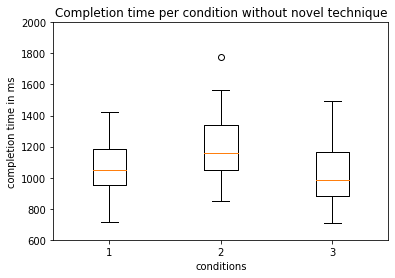

In [6]:
# boxplot
# some outliers go beyond the maximum y value, but decided on limits for better readability
plt.boxplot([cond1_novel_false, cond2_novel_false, cond3_novel_false])
plt.title('Completion time per condition without novel technique')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')
plt.ylim((600,2000))
plt.savefig('time_per_cond_without_novel_technique.pdf')

### Completion time per condition with novel technique

In [7]:
cond1_novel_true = df_cond_1['time(ms)'][df_cond_1['use_novel_technique'] == True]
cond2_novel_true = df_cond_2['time(ms)'][df_cond_2['use_novel_technique'] == True]
cond3_novel_true = df_cond_3['time(ms)'][df_cond_3['use_novel_technique'] == True]

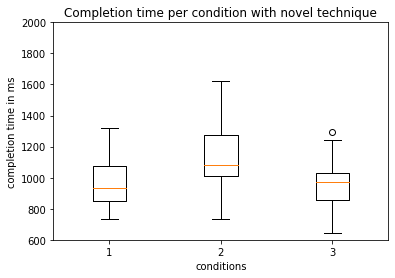

In [8]:
# boxplot
plt.boxplot([cond1_novel_true,cond2_novel_true, cond3_novel_true])
plt.title('Completion time per condition with novel technique')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')
plt.ylim((600,2000))
plt.savefig('time_per_cond_with_novel_technique.pdf')

### Completion time per condition and user without novel technique

In [9]:
cond_user1_novel_false = df_novel_false['current_size'][df_novel_false['user_id'] == 1]
cond_user1_time_novel_false = df_novel_false['time(ms)'][df_novel_false['user_id'] == 1]
cond_user2_novel_false = df_novel_false['current_size'][df_novel_false['user_id'] == 2]
cond_user2_time_novel_false= df_novel_false['time(ms)'][df_novel_false['user_id'] == 2]
cond_user3_novel_false = df_novel_false['current_size'][df_novel_false['user_id'] == 3]
cond_user3_time_novel_false = df_novel_false['time(ms)'][df_novel_false['user_id'] == 3]
cond_user4_novel_false = df_novel_false['current_size'][df_novel_false['user_id'] == 4]
cond_user4_time_novel_false = df_novel_false['time(ms)'][df_novel_false['user_id'] == 4]

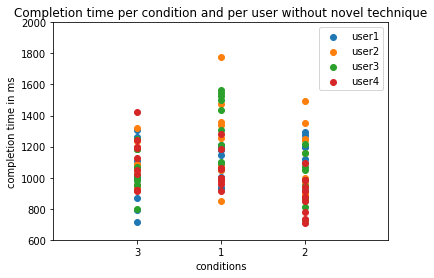

In [10]:
plt.scatter(cond_user1_novel_false, cond_user1_time_novel_false, label='user1')
plt.scatter(cond_user2_novel_false, cond_user2_time_novel_false, label='user2')
plt.scatter(cond_user3_novel_false, cond_user3_time_novel_false, label='user3')
plt.scatter(cond_user4_novel_false, cond_user4_time_novel_false, label='user4')
plt.legend(loc=1)
plt.title('Completion time per condition and per user without novel technique')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')
plt.ylim((600,2000))
plt.xticks(["[20, 10]", "[8, 4]", "[10, 5]"], [1, 2, 3])
plt.xlim(-1, 3)
plt.savefig('time_per_cond_and_user_without_novel_technique.pdf')

### Completion time per condition and user with novel technique

In [11]:
cond_user1_novel_true = df_novel_true['current_size'][df_novel_true['user_id'] == 1]
cond_user1_time_novel_true = df_novel_true['time(ms)'][df_novel_true['user_id'] == 1]
cond_user2_novel_true = df_novel_true['current_size'][df_novel_true['user_id'] == 2]
cond_user2_time_novel_true= df_novel_true['time(ms)'][df_novel_true['user_id'] == 2]
cond_user3_novel_true= df_novel_true['current_size'][df_novel_true['user_id'] == 3]
cond_user3_time_novel_true = df_novel_true['time(ms)'][df_novel_true['user_id'] == 3]
cond_user4_novel_true = df_novel_true['current_size'][df_novel_true['user_id'] == 4]
cond_user4_time_novel_true = df_novel_true['time(ms)'][df_novel_true['user_id'] == 4]

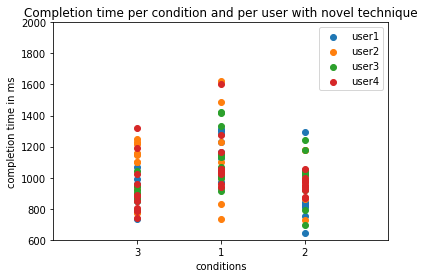

In [12]:
plt.scatter(cond_user1_novel_true, cond_user1_time_novel_true, label='user1')
plt.scatter(cond_user2_novel_true, cond_user2_time_novel_true, label='user2')
plt.scatter(cond_user3_novel_true, cond_user3_time_novel_true, label='user3')
plt.scatter(cond_user4_novel_true, cond_user4_time_novel_true, label='user4')
plt.legend(loc=1)
plt.title('Completion time per condition and per user with novel technique')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')
plt.xticks(["[20, 10]", "[8, 4]", "[10, 5]"], [1, 2, 3])
plt.ylim((600,2000))
plt.xlim(-1, 3)
plt.savefig('time_per_cond_and_user_with_novel_technique.pdf')

### Errors per condition without improvement

In [13]:
cond1_err_false = df_novel_false['errors'][df_novel_false['current_size'] == "[20, 10]"][df_novel_false['errors'] == 0].count() 
cond1_err_true = df_novel_false['errors'][df_novel_false['current_size'] == "[20, 10]"][df_novel_false['errors'] == 1].count()
cond2_err_false = df_novel_false['errors'][df_novel_false['current_size'] == "[8, 4]"][df_novel_false['errors'] == 0].count()
cond2_err_true = df_novel_false['errors'][df_novel_false['current_size'] == "[8, 4]"][df_novel_false['errors'] == 1].count()
cond3_err_false = df_novel_false['errors'][df_novel_false['current_size'] =="[10, 5]"][df_novel_false['errors'] == 0].count()
cond3_err_true = df_novel_false['errors'][df_novel_false['current_size'] == "[10, 5]"][df_novel_false['errors'] == 1].count()

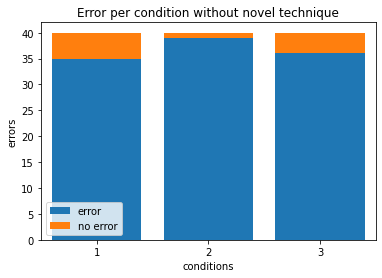

In [14]:
err_cond=[1,2,3]
plt.bar(err_cond, (cond1_err_false, cond2_err_false, cond3_err_false), label='error')
plt.bar(err_cond, (cond1_err_true, cond2_err_true , cond3_err_true), bottom=(cond1_err_false, cond2_err_false, cond3_err_false), label='no error')
plt.title('Error per condition without novel technique')
plt.xlabel('conditions')
plt.ylabel('errors')
plt.legend()
plt.xticks([1, 2, 3], [1, 2, 3])
plt.xlim(0.5, 3.5)
plt.savefig('error_per_cond_without_novel.pdf')

### Errors per condition with improvement

In [15]:
cond1_err_false = df_novel_true['errors'][df_novel_true['current_size'] == "[20, 10]"][df_novel_true['errors'] == 0].count() 
cond1_err_true = df_novel_true['errors'][df_novel_true['current_size'] == "[20, 10]"][df_novel_true['errors'] == 1].count()
cond2_err_false = df_novel_true['errors'][df_novel_true['current_size'] == "[8, 4]"][df_novel_true['errors'] == 0].count()
cond2_err_true = df_novel_true['errors'][df_novel_true['current_size'] == "[8, 4]"][df_novel_true['errors'] == 1].count()
cond3_err_false = df_novel_true['errors'][df_novel_true['current_size'] =="[10, 5]"][df_novel_true['errors'] == 0].count()
cond3_err_true = df_novel_true['errors'][df_novel_true['current_size'] == "[10, 5]"][df_novel_true['errors'] == 1].count()

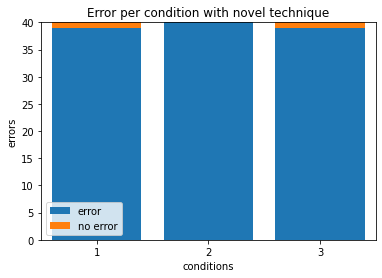

In [16]:
err_cond=[1,2,3]
plt.bar(err_cond, (cond1_err_false, cond2_err_false, cond3_err_false), label='error')
plt.bar(err_cond, (cond1_err_true, cond2_err_true , cond3_err_true), bottom=(cond1_err_false, cond2_err_false, cond3_err_false), label='no error')
plt.title('Error per condition with novel technique')
plt.xlabel('conditions')
plt.ylabel('errors')
plt.legend()
plt.xticks([1, 2, 3], [1, 2, 3])
plt.xlim(0.5, 3.5)
plt.savefig('error_per_cond_with_novel.pdf')

### Completion time per condition with and without novel technique

In [17]:
cond_novel_false = df_novel_false['current_size']
cond_time_novel_false = df_novel_false['time(ms)']
cond_novel_true = df_novel_true['current_size']
cond_time_novel_true = df_novel_true['time(ms)']

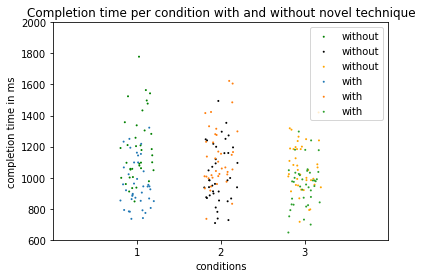

In [18]:
s = sns.stripplot(data =df_novel_false, x="current_size", y="time(ms)", jitter=0.2, size=2, label='without', palette=['green','black','orange','brown','dodgerblue','red'])
sns.stripplot(data =df_novel_true, x="current_size", y="time(ms)", jitter=0.2, size=2, label='with')

plt.legend(loc=1)
plt.title('Completion time per condition with and without novel technique')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')
s.set_xticklabels([1,2,3])
plt.xlim(-1, 3)
plt.ylim((600,2000))
plt.savefig('time_per_cond_and_user_with_or_without_novel.pdf')

### Errors per condition and user without improvement

In [19]:
cond1_user1_false_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[20, 10]"][df_novel_false['errors'] == 0][df_novel_false['user_id'] == 1].count() 
cond1_user1_true_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[20, 10]"][df_novel_false['errors'] == 1][df_novel_false['user_id'] == 1].count()
cond1_user2_false_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[20, 10]"][df_novel_false['errors'] == 0][df_novel_false['user_id'] == 2].count() 
cond1_user2_true_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[20, 10]"][df_novel_false['errors'] == 1][df_novel_false['user_id'] == 2].count()
cond1_user3_false_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[20, 10]"][df_novel_false['errors'] == 0][df_novel_false['user_id'] == 3].count() 
cond1_user3_true_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[20, 10]"][df_novel_false['errors'] == 1][df_novel_false['user_id'] == 3].count()
cond1_user4_false_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[20, 10]"][df_novel_false['errors'] == 0][df_novel_false['user_id'] == 4].count() 
cond1_user4_true_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[20, 10]"][df_novel_false['errors'] == 1][df_novel_false['user_id'] == 4].count()
cond2_user1_false_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[8, 4]"][df_novel_false['errors'] == 0][df_novel_false['user_id'] == 1].count() 
cond2_user1_true_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[8, 4]"][df_novel_false['errors'] == 1][df_novel_false['user_id'] == 1].count()
cond2_user2_false_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[8, 4]"][df_novel_false['errors'] == 0][df_novel_false['user_id'] == 2].count() 
cond2_user2_true_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[8, 4]"][df_novel_false['errors'] == 1][df_novel_false['user_id'] == 2].count()
cond2_user3_false_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[8, 4]"][df_novel_false['errors'] == 0][df_novel_false['user_id'] == 3].count() 
cond2_user3_true_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[8, 4]"][df_novel_false['errors'] == 1][df_novel_false['user_id'] == 3].count()
cond2_user4_false_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[8, 4]"][df_novel_false['errors'] == 0][df_novel_false['user_id'] == 4].count() 
cond2_user4_true_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[8, 4]"][df_novel_false['errors'] == 1][df_novel_false['user_id'] == 4].count()
cond3_user1_false_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[10, 5]"][df_novel_false['errors'] == 0][df_novel_false['user_id'] == 1].count() 
cond3_user1_true_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[10, 5]"][df_novel_false['errors'] == 1][df_novel_false['user_id'] == 1].count()
cond3_user2_false_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[10, 5]"][df_novel_false['errors'] == 0][df_novel_false['user_id'] == 2].count() 
cond3_user2_true_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[10, 5]"][df_novel_false['errors'] == 1][df_novel_false['user_id'] == 2].count()
cond3_user3_false_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[10, 5]"][df_novel_false['errors'] == 0][df_novel_false['user_id'] == 3].count() 
cond3_user3_true_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[10, 5]"][df_novel_false['errors'] == 1][df_novel_false['user_id'] == 3].count()
cond3_user4_false_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[10, 5]"][df_novel_false['errors'] == 0][df_novel_false['user_id'] == 4].count() 
cond3_user4_true_novel = df_novel_false['errors'][df_novel_false['current_size'] == "[10, 5]"][df_novel_false['errors'] == 1][df_novel_false['user_id'] == 4].count()

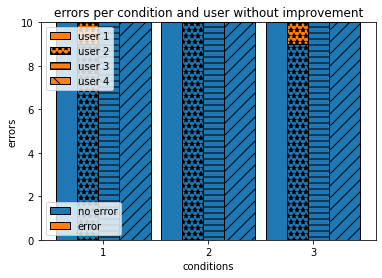

In [35]:
x  = np.arange(3)
plt.title('errors per condition and user without improvement')
width = 0.3

user1_false_novel = plt.bar(x - 0.3, (cond1_user1_false_novel, cond2_user1_false_novel, cond3_user1_false_novel), width, color='C0', 
                      edgecolor='#000000', label='error')
user1_true_novel = plt.bar(x - 0.3, (cond1_user1_true_novel, cond2_user1_true_novel, cond3_user1_true_novel), width, color='C1', 
                     edgecolor='#000000', bottom= (cond1_user1_false_novel, cond2_user1_false_novel, cond3_user1_false_novel), label='user 1')

user2_false_novel = plt.bar(x - 0.1, (cond1_user2_false_novel, cond2_user2_false_novel, cond3_user2_false_novel), width, color='C0',
                      edgecolor='#000000', hatch='**')
user2_true_novel = plt.bar(x - 0.1, (cond1_user2_true_novel, cond2_user2_true_novel, cond3_user2_true_novel), width, color='C1', 
                     edgecolor='#000000', hatch='**', bottom=(cond1_user2_false_novel, cond2_user2_false_novel, cond3_user2_false_novel), label="user 2")

user3_false_novel = plt.bar(x + 0.1, (cond1_user3_false_novel, cond2_user3_false_novel, cond3_user3_false_novel), width, color='C0',
                      edgecolor='#000000', hatch='--')
user3_true_novel = plt.bar(x + 0.1, (cond1_user3_true_novel, cond2_user3_true_novel, cond3_user3_true_novel), width, color='C1', 
                     edgecolor='#000000', hatch='--', bottom=(cond1_user3_false_novel, cond2_user3_false_novel, cond3_user3_false_novel), label='user 3')

user4_false_novel = plt.bar(x + 0.3, (cond1_user4_false_novel, cond2_user4_false_novel, cond3_user4_false_novel), width, color='C0',
                      edgecolor='#000000', hatch='//')
user4_true_novel = plt.bar(x + 0.3, (cond1_user4_true_novel, cond2_user4_true_novel, cond3_user4_true_novel), width, color='C1', 
                     edgecolor='#000000', hatch='\\', bottom= (cond1_user4_false_novel, cond2_user4_false_novel, cond3_user4_false_novel), label='user 4')

plt.xlabel('conditions')
plt.xticks(x, ['1', '2', '3'])
plt.ylabel('errors')

legend_one = plt.legend(handles=[user1_true_novel, user2_true_novel, user3_true_novel, user4_true_novel], loc=2)
plt.gca().add_artist(legend_one)
plt.legend([user1_false_novel, user1_true_novel], ['no error', 'error'])
plt.savefig('error_per_cond_and user_with_novel_technique.pdf')

### Errors per condition and user without improvement

In [21]:
cond1_user1_false_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[20, 10]"][df_novel_true['errors'] == 0][df_novel_true['user_id'] == 1].count() 
cond1_user1_true_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[20, 10]"][df_novel_true['errors'] == 1][df_novel_true['user_id'] == 1].count()
cond1_user2_false_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[20, 10]"][df_novel_true['errors'] == 0][df_novel_true['user_id'] == 2].count() 
cond1_user2_true_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[20, 10]"][df_novel_true['errors'] == 1][df_novel_true['user_id'] == 2].count()
cond1_user3_false_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[20, 10]"][df_novel_true['errors'] == 0][df_novel_true['user_id'] == 3].count() 
cond1_user3_true_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[20, 10]"][df_novel_true['errors'] == 1][df_novel_true['user_id'] == 3].count()
cond1_user4_false_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[20, 10]"][df_novel_true['errors'] == 0][df_novel_true['user_id'] == 4].count() 
cond1_user4_true_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[20, 10]"][df_novel_true['errors'] == 1][df_novel_true['user_id'] == 4].count()
cond2_user1_false_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[8, 4]"][df_novel_true['errors'] == 0][df_novel_true['user_id'] == 1].count() 
cond2_user1_true_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[8, 4]"][df_novel_true['errors'] == 1][df_novel_true['user_id'] == 1].count()
cond2_user2_false_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[8, 4]"][df_novel_true['errors'] == 0][df_novel_true['user_id'] == 2].count() 
cond2_user2_true_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[8, 4]"][df_novel_true['errors'] == 1][df_novel_true['user_id'] == 2].count()
cond2_user3_false_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[8, 4]"][df_novel_true['errors'] == 0][df_novel_true['user_id'] == 3].count() 
cond2_user3_true_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[8, 4]"][df_novel_true['errors'] == 1][df_novel_true['user_id'] == 3].count()
cond2_user4_false_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[8, 4]"][df_novel_true['errors'] == 0][df_novel_true['user_id'] == 4].count() 
cond2_user4_true_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[8, 4]"][df_novel_true['errors'] == 1][df_novel_true['user_id'] == 4].count()
cond3_user1_false_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[10, 5]"][df_novel_true['errors'] == 0][df_novel_true['user_id'] == 1].count() 
cond3_user1_true_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[10, 5]"][df_novel_true['errors'] == 1][df_novel_true['user_id'] == 1].count()
cond3_user2_false_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[10, 5]"][df_novel_true['errors'] == 0][df_novel_true['user_id'] == 2].count() 
cond3_user2_true_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[10, 5]"][df_novel_true['errors'] == 1][df_novel_true['user_id'] == 2].count()
cond3_user3_false_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[10, 5]"][df_novel_true['errors'] == 0][df_novel_true['user_id'] == 3].count() 
cond3_user3_true_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[10, 5]"][df_novel_true['errors'] == 1][df_novel_true['user_id'] == 3].count()
cond3_user4_false_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[10, 5]"][df_novel_true['errors'] == 0][df_novel_true['user_id'] == 4].count() 
cond3_user4_true_novel = df_novel_true['errors'][df_novel_true['current_size'] == "[10, 5]"][df_novel_true['errors'] == 1][df_novel_true['user_id'] == 4].count()

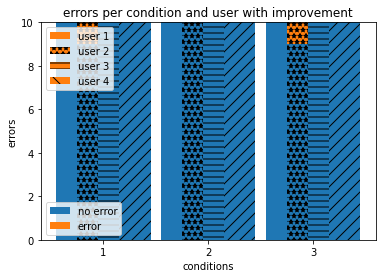

In [34]:
x  = np.arange(3)
plt.title('errors per condition and user with improvement')
width = 0.3

user1_false_novel = plt.bar(x - 0.3, (cond1_user1_false_novel, cond2_user1_false_novel, cond3_user1_false_novel), width, color='C0', 
                      edgecolor='#000000', label='error')
user1_true_novel = plt.bar(x - 0.3, (cond1_user1_true_novel, cond2_user1_true_novel, cond3_user1_true_novel), width, color='C1', 
                     edgecolor='#000000', bottom= (cond1_user1_false_novel, cond2_user1_false_novel, cond3_user1_false_novel), label='user 1')

user2_false_novel = plt.bar(x - 0.1, (cond1_user2_false_novel, cond2_user2_false_novel, cond3_user2_false_novel), width, color='C0',
                      edgecolor='#000000', hatch='**')
user2_true_novel = plt.bar(x - 0.1, (cond1_user2_true_novel, cond2_user2_true_novel, cond3_user2_true_novel), width, color='C1', 
                     edgecolor='#000000', hatch='**', bottom=(cond1_user2_false_novel, cond2_user2_false_novel, cond3_user2_false_novel), label="user 2")

user3_false_novel = plt.bar(x + 0.1, (cond1_user3_false_novel, cond2_user3_false_novel, cond3_user3_false_novel), width, color='C0',
                      edgecolor='#000000', hatch='--')
user3_true_novel = plt.bar(x + 0.1, (cond1_user3_true_novel, cond2_user3_true_novel, cond3_user3_true_novel), width, color='C1', 
                     edgecolor='#000000', hatch='--', bottom=(cond1_user3_false_novel, cond2_user3_false_novel, cond3_user3_false_novel), label='user 3')

user4_false_novel = plt.bar(x + 0.3, (cond1_user4_false_novel, cond2_user4_false_novel, cond3_user4_false_novel), width, color='C0',
                      edgecolor='#000000', hatch='//')
user4_true_novel = plt.bar(x + 0.3, (cond1_user4_true_novel, cond2_user4_true_novel, cond3_user4_true_novel), width, color='C1', 
                     edgecolor='#000000', hatch='\\', bottom= (cond1_user4_false_novel, cond2_user4_false_novel, cond3_user4_false_novel), label='user 4')

plt.xlabel('conditions')
plt.xticks(x, ['1', '2', '3'])
plt.ylabel('errors')

# from 
first_legend = plt.legend(handles=[user1_true_novel, user2_true_novel, user3_true_novel, user4_true_novel], loc=2)
plt.gca().add_artist(first_legend)
plt.legend([user1_false_novel, user1_true_novel], ['no error', 'error'])
plt.savefig('error_per_cond_and user_with_novel_technique.pdf')

### Statistical Test

In [23]:
x1 = df_novel_true["time(ms)"]
x2 = df_novel_false["time(ms)"]

In [24]:
stats.ttest_rel(x1,x2)

Ttest_relResult(statistic=-2.6251755822521465, pvalue=0.009797099400474137)

In [25]:
print("With Novel Technique: (M = {} SD = {})".format(round(np.mean(x1),2), round(np.std(x1),2)))
print("Without Novel Technique: (M = {} SD = {})".format(round(np.mean(x2),2), round(np.std(x2),2)))

With Novel Technique: (M = 1024.51 SD = 209.31)
Without Novel Technique: (M = 1107.76 SD = 248.4)


In [26]:
y1 = df_novel_true["errors"]
y2 = df_novel_false["errors"]

In [27]:
stats.ttest_rel(y1,y2)

Ttest_relResult(statistic=-2.352633358798228, pvalue=0.020282375153148874)

In [28]:
print("With Novel Technique: (M = {} SD = {})".format(round(np.mean(y1),2), round(np.std(y1),2)))
print("Without Novel Technique: (M = {} SD = {})".format(round(np.mean(y2),2), round(np.std(y2),2)))

With Novel Technique: (M = 0.02 SD = 0.13)
Without Novel Technique: (M = 0.08 SD = 0.28)


## Discussion

The t-tests show that the pointing times with (M = 1024.51 SD = 209.31) and without(M = 1107.76 SD = 248.4) our novel pointing technique (M = 16.2, SD = 2.7), are significantly different (t= -2.63, p < .01). We can therefore reject our H01 as implementing our novel pointing technique significantly improves pointing time. The mean errors of participants with (M = 0.02 SD = 0.13) and without (M = 0.08 SD = 0.28) the new technique are also significantly different (t= -2.35, p = .02), with the mean errors being higher for the tasks without novel technique. As such we can also reject our H02.

The visualizations concerning completion times show, that the average time is faster with the technique for each condition. Experimenting with more different conditions could show when the new technique starts/stops helping the user. 

Our Results prove, that moving the cursor on top of the closest target when the user clicks, can significantly reduce pointing time and the amount of errors. It has to be kept in mind though, that our experiment had a very specific setup, so the results only count for pointing in environments with a grid like structure with similiar looking target, such as a Windows desktop. Further studies could look into pointing experiments where targets are set up randomly on the screen. Experimenting with different shapes for targets or moving targets could also yield additional insights. It also has to be said that we could only test 2 participants, so our results have to be taken with a grain of salt. Ideally, the experiment should be repeated with a larger number of participants.